In [64]:
%matplotlib inline

import sys
sys.path.append('/home/wt/py_projects/Human-Pose-Estimation-3D')

import numpy as np
import matplotlib.pyplot as plt
from datasets.custom_dataset import Custom_dataset

In [65]:
dir_path = '../data/custom/subset_gt_npz/'
data_path = dir_path + 'data_2d_cusdb_gt_cam2.npz'
data_path_3d = dir_path + 'data_3d_cusdb_cam2.npz'
keypoints = np.load(data_path, allow_pickle=True)['positions_2d_rgb']
dataset = Custom_dataset(data_path_3d)

frame = 2
valid_joints = dataset.valid_indexes()
keypoints = keypoints[:, :, valid_joints].squeeze()[frame]
joints = dataset._data.squeeze()[frame]

joints /= 1000
print(keypoints.shape)
print(joints.shape)


Preparing Custom Dataset...
(17, 2)
(17, 3)


In [66]:
joint_pairs = [[0, 1], [1, 2], [2, 3], [0, 4], [4, 5], [5, 6],
               [0, 7], [7, 8], [8, 9], [9, 10], [8, 11], [11, 12],
               [12, 13], [8, 14], [14, 15], [15, 16]]

colors_kps = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0],
              [50, 205, 50], [0, 255, 170], [0, 255, 255], [
                  0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255],
              [170, 0, 255], [255, 0, 255]]

def plot_keypoint(coordinates):
    fig = plt.figure(figsize=(8,8))
    x_max = coordinates[:, 0].max()
    x_min = coordinates[:, 0].min()
    y_max = coordinates[:, 1].max()
    y_min = coordinates[:, 1].min()
    # axes.set_xlim([0,h36m_cameras_intrinsic_params['res_w']])
    # axes.set_ylim([h36m_cameras_intrinsic_params['res_h'],0])
    plt.xlim(x_min-20,x_max+20)
    plt.ylim(y_max+20,y_min-20)
    plt.axis('equal')

    for i in range(coordinates.shape[0]):
        pts = coordinates[i]
        for color_i, jp in zip(colors_kps, joint_pairs):
            color_i = [c / 255 for c in color_i]
            pt_a = coordinates[jp[0]]
            pt_b = coordinates[jp[1]]
            # pt_a_x, pt_a_y, pt_b_x, pt_b_y = int(pt_a[0]), int(
            #     pt_a[1]), int(pt_b[0]), int(pt_b[1])
            pt_a_x, pt_a_y, pt_b_x, pt_b_y = pt_a[0],pt_a[1], pt_b[0], pt_b[1]
            plt.plot((pt_a_x, pt_b_x), (pt_a_y, pt_b_y), color=color_i, lw=2.0)
            plt.plot(pt_a_x,pt_a_y,marker='o',color=color_i)
            plt.plot(pt_b_x,pt_b_y,marker='o',color=color_i)



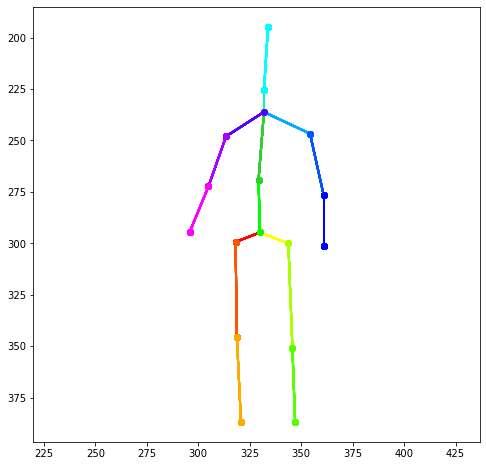

In [67]:
plot_keypoint(keypoints)

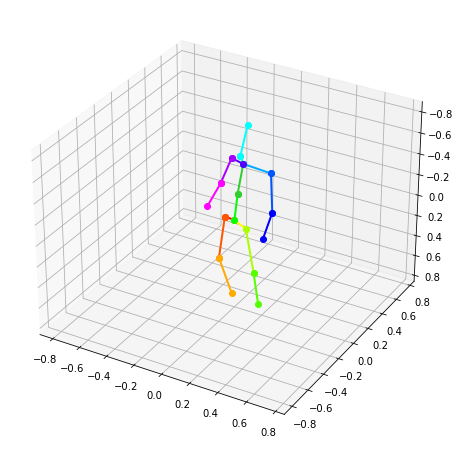

In [68]:
joints[1:] -= joints[0]
joints[0] = 0

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection='3d')

ymin = joints.min()
ymax = joints.max()

ax.set_zlim([ymax,ymin])
ax.set_xlim([ymin,ymax])
ax.set_ylim([ymin,ymax])

# ax.set_aspect('equal')

for color_i, jp in zip(colors_kps, joint_pairs):
    color_i = [c / 255 for c in color_i]
    pt_a = joints[jp[0]]
    pt_b = joints[jp[1]]
    # print(pt_a,pt_b)
    pt_a_x, pt_a_y, pt_a_z, pt_b_x, pt_b_y, pt_b_z = pt_a[
        0],   pt_a[1], pt_a[2], pt_b[0], pt_b[1], pt_b[2]
    # print(pt_a_z,pt_b_z)

    ax.plot((pt_a_x, pt_b_x), (pt_a_z, pt_b_z),
            (pt_a_y, pt_b_y), lw=2.0, c=color_i)
    ax.plot(pt_a_x, pt_a_z, pt_a_y, marker='o', color=color_i)
    ax.plot(pt_b_x, pt_b_z, pt_b_y, marker='o', color=color_i)